In [ ]:
import pandas as pd
import numpy as np 
#import geopandas # for bechir 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 

In [ ]:
df = pd.read_csv("train.csv")
df.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#Data analysis and feauture selection

In [ ]:
df.shape

(1017209, 9)

In [ ]:
len(Counter(df.Store))

1115

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,840445.000000,840445.000000,840444.000000,840444.000000,840444.000000,840444.000000,840444.000000
mean,558.336550,3.999227,5829.279067,636.701516,0.832392,0.375522,0.189362
std,321.923692,2.000162,3865.017649,464.661640,0.373518,0.484258,0.391796
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3785.000000,410.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5790.000000,612.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7910.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


In [ ]:
len(Counter(df.Date))*len(Counter(df.Store))

1050330

In [ ]:
stores =  pd.read_csv("store.csv", index_col= 0)
stores.head(5)

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
stores.shape

(1115, 9)

In [ ]:
stores.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
X = stores.join(df, on = 'Store')
X

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,,,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,5,2015-07-31,6064,625,1,1,0,1
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3,5,2015-07-31,8314,821,1,1,0,1
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",4,5,2015-07-31,13995,1498,1,1,0,1
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,5,5,2015-07-31,4822,559,1,1,0,1
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,6,5,2015-07-31,5651,589,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1112,5,2015-07-31,9626,767,1,1,0,1
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1113,5,2015-07-31,7289,720,1,1,0,1
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1114,5,2015-07-31,27508,3745,1,1,0,1


In [ ]:
X['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

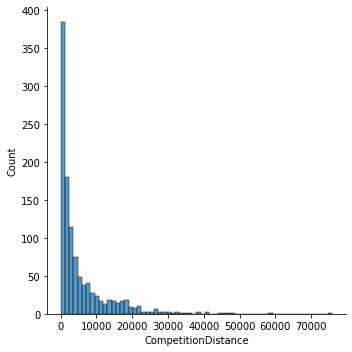

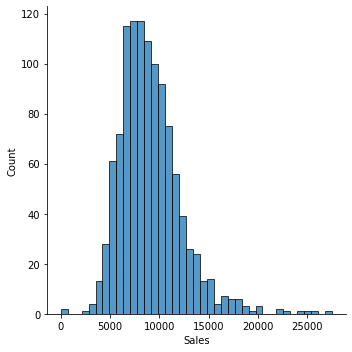

In [ ]:
sns.displot(x=X['CompetitionDistance'], label= 'Competition distance')
sns.displot(x=X['Sales'],label="Sales")

In [ ]:
X['Sales'].describe()

count     1115.000000
mean      9066.815247
std       3111.569290
min          0.000000
25%       6948.500000
50%       8568.000000
75%      10651.000000
max      27508.000000
Name: Sales, dtype: float64

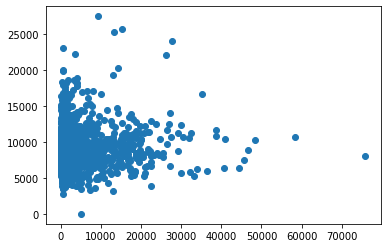

In [ ]:
plt.scatter(X['CompetitionDistance'],X['Sales'])

Percentage of NaN Values

In [ ]:
df.isna().sum() / len(df) *100

Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Sales            0.000119
Customers        0.000119
Open             0.000119
Promo            0.000119
StateHoliday     0.000119
SchoolHoliday    0.000119
dtype: float64

In [ ]:
stores.isna().sum() / len(stores) *100

StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [ ]:
X.isna().sum() / len(X) * 100

StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
dtype: float64

A lot of NaN values related to Promo2. Can be infered in cas of Promo2 is 0. 

For n_clusters = 2 The average silhouette_score is : 0.5526257340988996
For n_clusters = 3 The average silhouette_score is : 0.5213422491676326
For n_clusters = 4 The average silhouette_score is : 0.4896611210065537
For n_clusters = 5 The average silhouette_score is : 0.4721406974454791
For n_clusters = 6 The average silhouette_score is : 0.4549532759201623


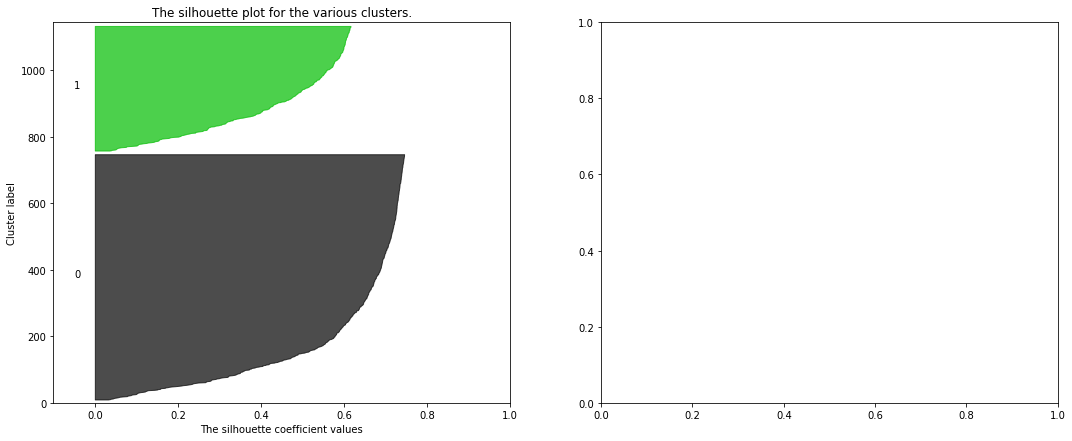

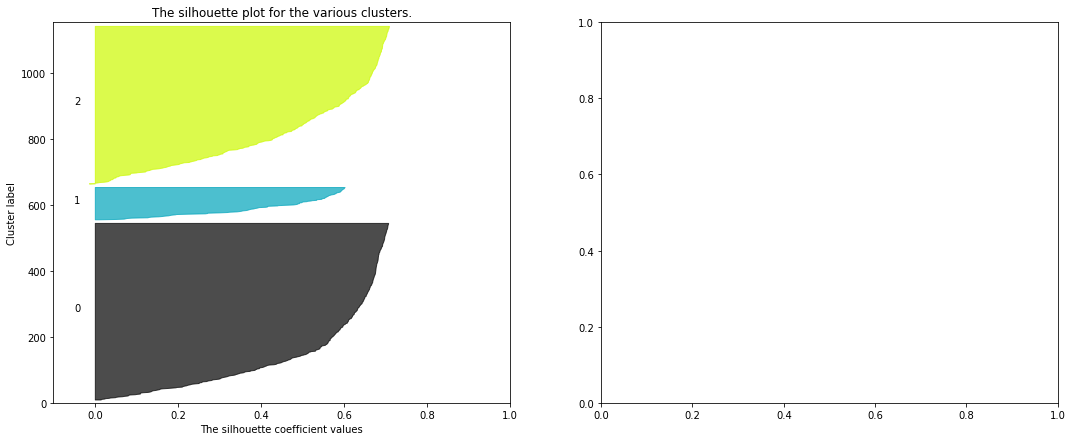

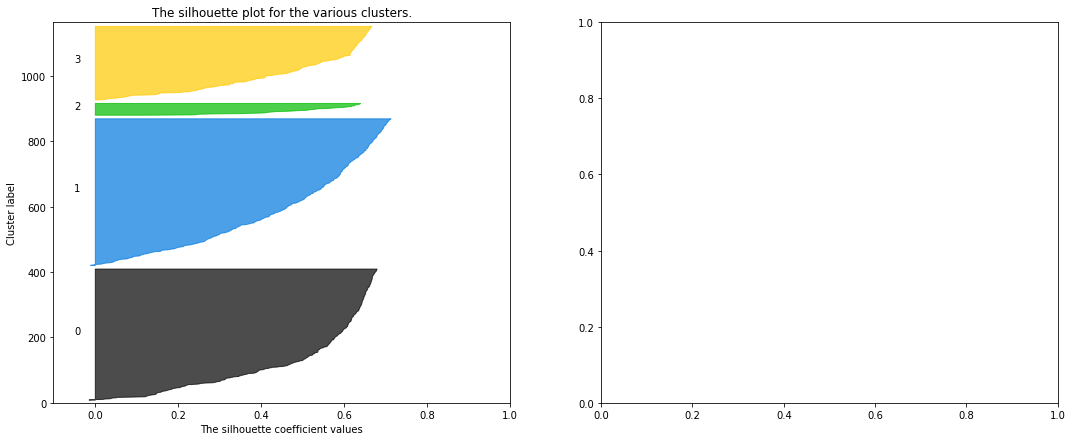

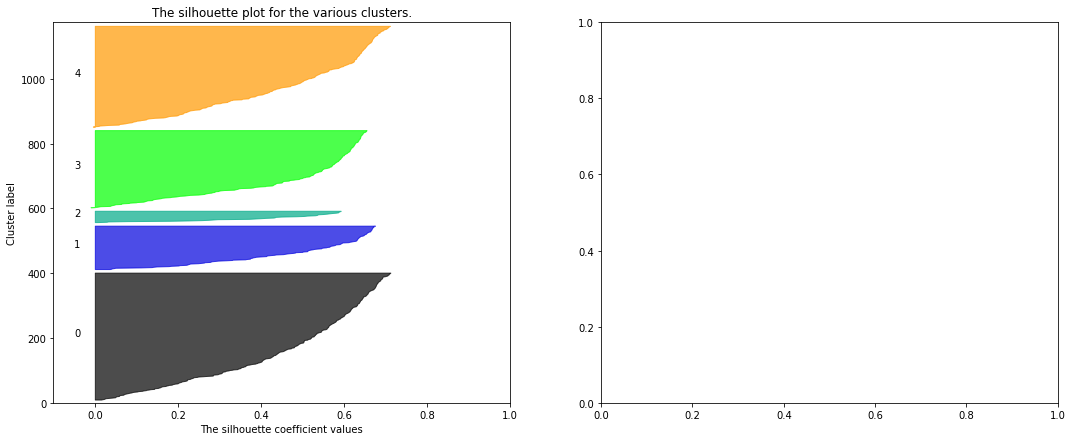

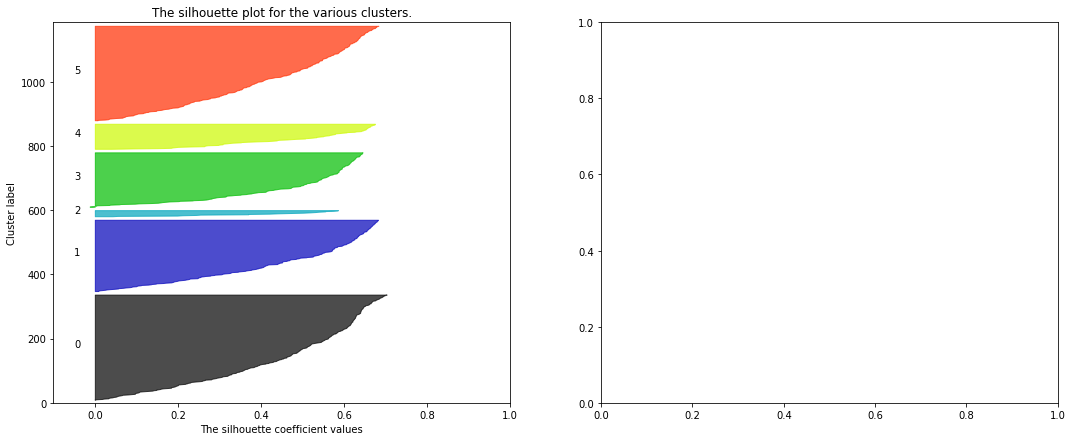

In [ ]:
store_cluster = X[['Store','Sales']]
X = store_cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")





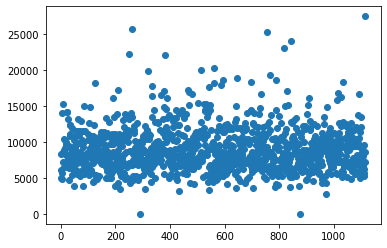

In [ ]:
plt.scatter(X.Store,X.Sales)

In [ ]:
df_stores = stores.join(df, on = 'Store')

df_stores['shop_cluster'] = kmeans.labels_.astype('int8')
stores['shop_cluster'] = df_stores['shop_cluster']

In [ ]:
df_stores

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,shop_cluster
Store,,,,,,,,,,,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,5,2015-07-31,6064,625,1,1,0,1,1
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3,5,2015-07-31,8314,821,1,1,0,1,1
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",4,5,2015-07-31,13995,1498,1,1,0,1,0
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,5,5,2015-07-31,4822,559,1,1,0,1,1
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,6,5,2015-07-31,5651,589,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1112,5,2015-07-31,9626,767,1,1,0,1,2
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1113,5,2015-07-31,7289,720,1,1,0,1,1
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1114,5,2015-07-31,27508,3745,1,1,0,1,0


In [ ]:
temp = pd.DataFrame()
temp["Date"] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
temp["year"] = pd.DatetimeIndex(temp["Date"]).year
temp['month'] = pd.DatetimeIndex(temp['Date']).month
temp['day'] = pd.DatetimeIndex(temp['Date']).day
temp['quarter'] = pd.DatetimeIndex(temp['Date']).quarter
temp['season'] = temp.month%12 // 3 + 1
month_in_year = 12
temp['month_sin'] = np.sin(2*np.pi*temp.month/month_in_year)
temp['month_cos'] = np.cos(2*np.pi*temp.month/month_in_year)
quarters_in_year = 4
temp['quarter_sin'] = np.sin(2*np.pi*temp.quarter/quarters_in_year)
temp['quarter_cos'] = np.cos(2*np.pi*temp.quarter/quarters_in_year)
seasons_in_year = 4
temp['season_sin'] = np.sin(2*np.pi*temp.season/seasons_in_year)
temp['season_cos'] = np.cos(2*np.pi*temp.season/seasons_in_year)

In [ ]:
df = df.join(temp.drop('Date',axis = 1))

In [ ]:
y = pd.DataFrame()
y['Store'] = df_stores['Store']
y['CompetitionDistance'] = df_stores['CompetitionDistance'].fillna(0)

In [ ]:
stores['Competition_cluster'] = kmeans.labels_.astype('int8')

In [ ]:
stores

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,shop_cluster,Competition_cluster
Store,,,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,2
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,2
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1,1
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,2
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2,2
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0,2
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,0


In [ ]:
df = df.join(stores, on = 'Store')


In [ ]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,quarter,season,month_sin,month_cos,quarter_sin,quarter_cos,season_sin,season_cos,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,shop_cluster,Competition_cluster
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2,3
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,1,2
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,2
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,1,2
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,0,2


In [ ]:
df['CompetitionYears'] = df['year'] - df['CompetitionOpenSinceYear']
df['CompetitionYears'] = df['CompetitionYears'].fillna(0)
for i in range(len(df)):
  if df.CompetitionYears[i] < 0:
    df.CompetitionYears[i] = 0
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,quarter,season,month_sin,month_cos,quarter_sin,quarter_cos,season_sin,season_cos,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,shop_cluster,Competition_cluster,CompetitionYears
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,0,7.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2,0,8.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1,1,9.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2,0,6.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0,0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2,0,7.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,3,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,0,0,0.0


In [ ]:
df = df.reindex(index= df['Sales'].index[::-1])
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,quarter,season,month_sin,month_cos,quarter_sin,quarter_cos,season_sin,season_cos,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,shop_cluster,Competition_cluster,CompetitionYears
1017208,1115,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,3,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,0,0,0.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,1,3,0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2,0,7.0
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1,0.5,0.866025,1.0,6.123234e-17,1.0,6.123234e-17,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2,2,0.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2,0,6.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1,1,9.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,3,-0.5,-0.866025,-1.0,-1.836970e-16,-1.0,-1.836970e-16,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2,0,8.0


In [ ]:

X = df.drop(['CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear','Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','season','season_sin','quarter_sin','Date'],axis = 1)
target = df['Sales']

In [ ]:
X

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,quarter,month_sin,month_cos,quarter_cos,season_cos,StoreType,Assortment,Promo2,shop_cluster,Competition_cluster,CompetitionYears
1017208,1115,2,0,0,0,0,a,1,2013,1,1,1,0.5,0.866025,6.123234e-17,6.123234e-17,d,c,1,2,3,0.0
1017207,1114,2,0,0,0,0,a,1,2013,1,1,1,0.5,0.866025,6.123234e-17,6.123234e-17,a,c,0,0,0,0.0
1017206,1113,2,0,0,0,0,a,1,2013,1,1,1,0.5,0.866025,6.123234e-17,6.123234e-17,a,c,0,1,3,0.0
1017205,1112,2,0,0,0,0,a,1,2013,1,1,1,0.5,0.866025,6.123234e-17,6.123234e-17,c,c,0,2,0,7.0
1017204,1111,2,0,0,0,0,a,1,2013,1,1,1,0.5,0.866025,6.123234e-17,6.123234e-17,a,a,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,5,4822,559,1,1,0,1,2015,7,31,3,-0.5,-0.866025,-1.836970e-16,-1.836970e-16,a,a,0,2,2,0.0
3,4,5,13995,1498,1,1,0,1,2015,7,31,3,-0.5,-0.866025,-1.836970e-16,-1.836970e-16,c,c,0,2,0,6.0
2,3,5,8314,821,1,1,0,1,2015,7,31,3,-0.5,-0.866025,-1.836970e-16,-1.836970e-16,a,a,1,1,1,9.0
1,2,5,6064,625,1,1,0,1,2015,7,31,3,-0.5,-0.866025,-1.836970e-16,-1.836970e-16,a,a,1,2,0,8.0


In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Open                 1017209 non-null  int64  
 3   Promo                1017209 non-null  int64  
 4   StateHoliday         1017209 non-null  object 
 5   SchoolHoliday        1017209 non-null  int64  
 6   StoreType            1017209 non-null  object 
 7   Assortment           1017209 non-null  object 
 8   Promo2               1017209 non-null  int64  
 9   shop_cluster         1017209 non-null  int8   
 10  Competition_cluster  1017209 non-null  int8   
 11  year                 1017209 non-null  int64  
 12  month                1017209 non-null  int64  
 13  quarter              1017209 non-null  int64  
 14  month_sin            1017209 non-null  float64
 15

In [ ]:
X.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'year', 'month', 'day', 'month_sin', 'month_cos',
       'StoreType', 'shop_cluster', 'Competition_cluster', 'CompetitionYears'],
      dtype='object')

In [ ]:
othercols = ['Store', 'DayOfWeek', 'Open', 'Promo',
         'shop_cluster',
       'Competition_cluster', 'year', 'month', 'day', 'month_sin'
       ,
       'CompetitionYears']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
def labelencoder(df):
  df = df.replace({'StateHoliday':{'0':0,'a':1,'b':2,'c':3}})
  
  df['StateHoliday'] = df['StateHoliday'].fillna(4)
  df["StoreType"] = df["StoreType"].fillna('Unknown')
  
  
  ####
  df["StoreType"] = df["StoreType"].astype('category')
  df["StateHoliday"] = df["StateHoliday"].astype('category')
  
  ###
  df["StoreType"] = OrdinalEncoder().fit_transform(df[['StoreType']])
  df["StateHoliday"] = OrdinalEncoder().fit_transform(df[["StateHoliday"]])
  
  return df
transformer_labels = FunctionTransformer(
    lambda X_df: labelencoder(X_df)
)
transformer = make_column_transformer((transformer_labels,['StateHoliday','StoreType']),('passthrough',othercols))

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 60kB/s 


In [ ]:
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
X = X[1116:len(X)-1]
target = target[0:len(target)-1117]

In [ ]:
X = transformer.fit_transform(X)


In [ ]:
X[1,:]

array([ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  3.000e+00,
        5.000e+00,  1.000e+00,  1.000e+00,  1.000e+00,  1.000e+00,
        0.000e+00,  1.000e+00,  2.015e+03,  7.000e+00,  3.000e+00,
       -5.000e-01,  9.000e+00])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import gc
gc.collect()

18384

In [ ]:
X = X.drop(['shop_cluster','CompetitionYears','Assortment','StoreType'],axis= 1)
othercols = ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
        'Promo2',
       'Competition_cluster', 'year', 'month', 'quarter', 'month_sin',
       'month_cos', 'quarter_cos']
def labelencoder2(df):
  df = df.replace({'StateHoliday':{'0':0,'a':1,'b':2,'c':3}})
  df['StateHoliday'] = df['StateHoliday'].fillna(4)

  
  ####
  
  df["StateHoliday"] = df["StateHoliday"].astype('category')
  
  ###
  
  df["StateHoliday"] = OrdinalEncoder().fit_transform(df[["StateHoliday"]])
  
  return df
transformer_labels2 = FunctionTransformer(
    lambda X_df: labelencoder2(X_df)
)
transformer2 = make_column_transformer((transformer_labels2,['StateHoliday']),('passthrough',othercols))
pipe = make_pipeline(
    
    SimpleImputer(strategy='most_frequent'), 
    model
    
)
X = X[46830:len(X)-1]
target = target[0:len(target)-46831]
X = transformer2.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.75, random_state=42)
pipe.fit(X_train[l],y_train.values[l])
y_pred = pipe.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

#Model

In [ ]:
import xgboost as xg 
model = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 100,max_depth = 50,gamma = 1, learning_rate = 0.5,n_jobs = -1)


In [ ]:
model2 = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 1000,max_depth = 50,n_jobs = -1)

In [ ]:
eval = df[int(len(df)/2):len(df)]
train_df = df[2996:int(len(df)/2)]

In [ ]:
X = train_df.drop(['CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear','Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','season','season_sin','quarter_sin','Date','Customers','quarter','quarter_cos', 'season_cos','Assortment', 'Promo2'],axis = 1)
X_eval = eval.drop(['CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear','Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','season','season_sin','quarter_sin','Date','Customers','quarter','quarter_cos', 'season_cos','Assortment', 'Promo2'],axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler as scaler


In [ ]:
y_train = X['Sales'].values
X_train = transformer.fit_transform(X.drop('Sales',axis=1))
X_train = scaler().fit_transform(X_train)
X_train = X_train[0:len(X_train)-1]
y_train = y_train[1:len(y_train)]
y_train = np.log1p(y_train)
model.fit(X_train,y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=50, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
StoreID,weeks,day,month,year = 13,6,23,7,2015
test = X_eval[X_eval["Store"] == StoreID]

start_idx = test.index[(test['day'] == day) & (test['month'] == month )& (test['year'] == year )].to_list()[0]


In [ ]:
import pickle 
filename = 'finalized_model.sav'
f =  open(filename, 'wb')
pickle.dump(model,f)
f.close()

In [ ]:
def mape(y_true, y_pred): 
    L=[]
    for i in range(len(y_true)):
      if y_true[i] == 0:
        i = i+1
      else:
        L.append(np.abs((y_true[i] - y_pred[i]) / y_true[i]))
    return np.mean(L) * 100

In [ ]:
def makePredictionBystore(StoreID,weeks,day,month,year):
  from sklearn.metrics import mean_absolute_error as mae
  from sklearn.metrics import mean_squared_error as mse
  Data = X[X["Store"] == StoreID].drop('Sales',axis = 1)
  target = X[X["Store"] == StoreID]["Sales"] 
  sales =  X_eval[X_eval["Store"] == StoreID].Sales.values
  Data = transformer.fit_transform(Data)
  test = X_eval[X_eval["Store"] == StoreID].drop('Sales',axis = 1)
  test = test.reset_index(drop=True)
  
  
  start_idx = test.index[(test['day'] == day) & (test['month'] == month )& (test['year'] == year )].to_list()[0]
     
  sales = sales[start_idx:start_idx+7*weeks]
  test = test[start_idx:start_idx+7*weeks]
  cl = test['shop_cluster']
  cp = test['StoreType'].values
  
  y_test = (X_eval["Sales"].values)[start_idx+1:start_idx+7*weeks+1]
  correction = y_test[0:start_idx]
  test = transformer.fit_transform(test)
  
  test = scaler().fit_transform(test)
  predictions = []
  target = np.log1p(target)
  sales = np.log1p(sales)
  model2.fit(Data,target)
  for i in range(7*weeks):
    t = test[i,:].reshape((1,len(test[i,:])))
    if (cl.values[i]==1) & (cp[i]=='b'):
      p = (0.9*model.predict(t)+model2.predict(t)+1.3*np.mean(target))/2
    else:
      p = (0.9*model.predict(t)+1*model2.predict(t)+1.3*np.mean(target))/3
    predictions.append(p)
    Data = np.vstack((Data,test[i,:]))
    
    target = np.append(target,p)
    
    model2.fit(Data,target)
    
  mae = mae(np.expm1(sales),np.expm1(predictions))
  rmse =  np.sqrt(mse(np.expm1(sales),np.expm1(predictions)))
  map = mape(np.expm1(sales),np.expm1(predictions))
  return rmse,mae,np.expm1(predictions),np.expm1(sales),map

# 2 new features and 1 specific transformation: 


*   **shop cluster**
*   **Competition cluster**
*  **Month cosine**



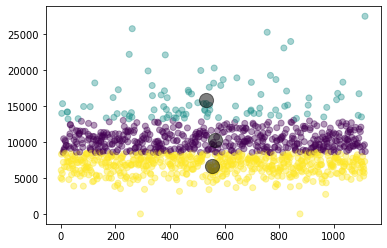

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
clusters = kmeans.predict(X)

plt.scatter(X['Store'],X['Sales'], c = clusters,alpha=0.4, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

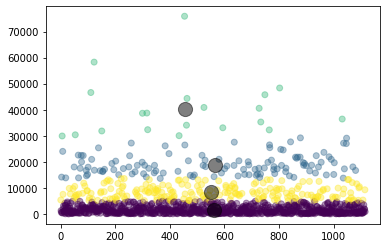

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(y)
clusters = kmeans.predict(y)

plt.scatter(y['Store'],y['CompetitionDistance'], c = clusters,alpha=0.4, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

Store =  334 RMSE = 795.9022916163914 , MAE = 562.9168247041258 ,mape = 11.759420484304428 %


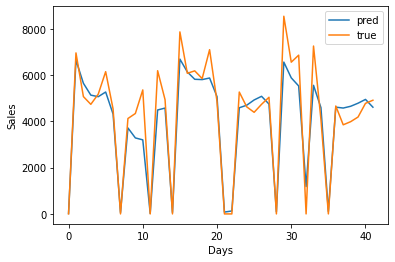

Store =  916 RMSE = 779.5357589117032 , MAE = 536.9763188135063 ,mape = 11.701873689889908 %


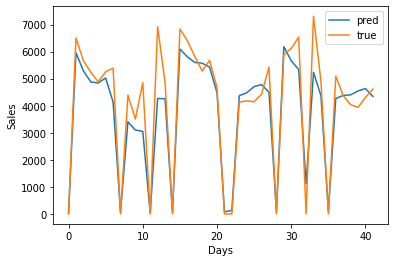

Store =  31 RMSE = 1391.5944081070245 , MAE = 811.2461627778558 ,mape = 16.596023738384247 %


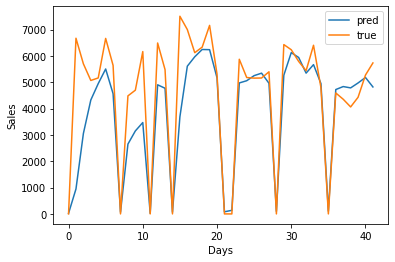

Store =  1036 RMSE = 943.0169340706775 , MAE = 639.7570631390523 ,mape = 14.144064486026764 %


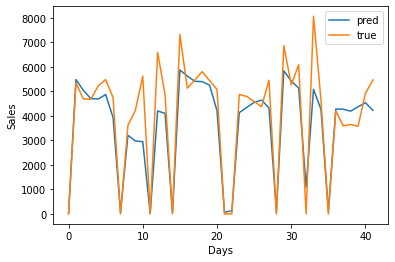

Store =  425 RMSE = 590.1845824518467 , MAE = 425.4187654767719 ,mape = 17.462213337421417 %


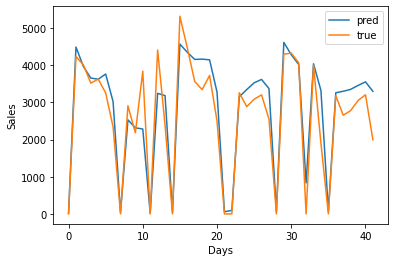

Store =  597 RMSE = 843.3328309170422 , MAE = 577.4090810957406 ,mape = 12.568241357803345 %


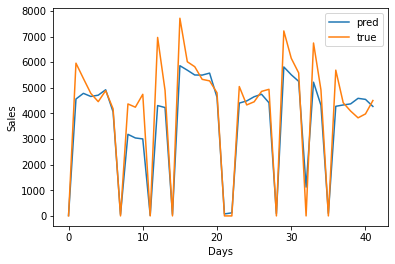

In [ ]:
for i in [334,916,31,1036,425,597]:
  rmse,mae,pred,true,map = makePredictionBystore(i,6,18,5,2014)
  print("Store = ",i,"RMSE =",rmse,", MAE =",mae,',mape =',map,"%")
  plt.plot(pred,label = 'pred')
  plt.plot(true, label= 'true')
  plt.xlabel('Days')
  plt.ylabel('Sales')
  plt.legend()
  plt.show()

In [ ]:
stores = np.random.choice(np.arange(1,1115,1),200)

for i in stores:
  try:
    print("store ",i)
    rmse,mae,pred,true,map = makePredictionBystore(i,6,18,5,2014)
    print("RMSE =",rmse,", MAE =",mae,',mape =',map,"%")
  except IndexError:
    continue

store  385
RMSE = 2142.07238518583 , MAE = 1679.2590571358094 ,mape = 25.284895300865173 %
store  1048
RMSE = 2205.5640181032354 , MAE = 1393.0020802815761 ,mape = 22.777236998081207 %
store  607
RMSE = 1849.1822205328385 , MAE = 1208.6612530662894 ,mape = 60.94808578491211 %
store  344
RMSE = 3227.084643514123 , MAE = 1955.4869017373949 ,mape = 24.96783584356308 %
store  480
RMSE = 1717.4081167309005 , MAE = 1065.6773748851954 ,mape = 29.1642427444458 %
store  854
RMSE = 1955.5310111571323 , MAE = 1266.6887370064146 ,mape = 22.2625270485878 %
store  912
RMSE = 1419.2081504409252 , MAE = 875.5627024968463 ,mape = 18.44991147518158 %
store  795
RMSE = 993.3848070434359 , MAE = 690.0970222836445 ,mape = 17.66250431537628 %
store  1010
RMSE = 3168.90945292125 , MAE = 2252.8273273649675 ,mape = 29.404419660568237 %
store  787
RMSE = 4056.86050224919 , MAE = 2967.7839840934384 ,mape = 33.61988961696625 %
store  355
RMSE = 3169.29607443001 , MAE = 2177.862065269833 ,mape = 27.98229455947876 